In [1]:
from utils.algorithm import overlay_of_subdivision
from utils.data_structures import DCEL
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
w = [(1,1), (2,2), (1,3), (0,2)]
w_e = [[i, i+1] for i in range(len(w)-1)]
w_e.append([len(w) - 1, 0])
v = [(x[0] + 1, x[1]) for x in w]
v_e = [[i, i+1] for i in range(len(v)-1)]
v_e.append([len(v) - 1, 0])

In [15]:
w = [(1,1), (2,2), (1,3), (0,2), (1,1)]
v = [(x[0] + 2, x[1]) for x in w]
w += v
v = [(x[0] + 1, x[1]) for x in w]
w_e = [[i, i+1] for i in range(len(w)-1) if i != 4]
v_e = [[i, i+1] for i in range(len(v)-1) if i != 4]

In [5]:
w = [(1,1), (2,2), (1.5, 2.5), (1,1)]
w_e = [[i, i+1] for i in range(len(w)-1) if i != 4]

v = [(1.5, 1), (2.5, 3), (3,2), (1.5,1)]
v_e = [[i, i+1] for i in range(len(v)-1) if i != 4]

In [16]:
w = [
    (1,1),
    (9,3),
    (14,3),
    (6,8),
    (2,11),
    (6,15),
    (10,13),
    (14,11),
    (11,18),
    (16,18),
    (13,23)
]
w_e = [
    [0, 1],
    [1, 2],
    [1, 3],
    [0, 4],
    [2, 6],
    [3, 4],
    [3, 6],
    [4, 5],
    [7, 6],
    [7, 9],
    [6, 5],
    [6, 8],
    [5, 8],
    [8, 9],
    [8, 10],
    [9, 10]
]

v = [
    (7,1),
    (4,5),
    (11,5),
    (8,9),
    (14,9),
    (6,12),
    (2,15),
    (12, 15),
    (8 , 18),
    (16, 21)
]

v_e = [
    [0,1],
    [0,2],
    [1,2],
    [1,3],
    [2,3],
    [2,4],
    [3,4],
    [3,5],
    [4, 7],
    [5 ,7],
    [5,6],
    [6,8],
    [7, 8],
    [7,9],
    [8,9]
]

In [17]:

S1 = DCEL(w, w_e)
S2 = DCEL(v, v_e)


<IPython.core.display.Javascript object>


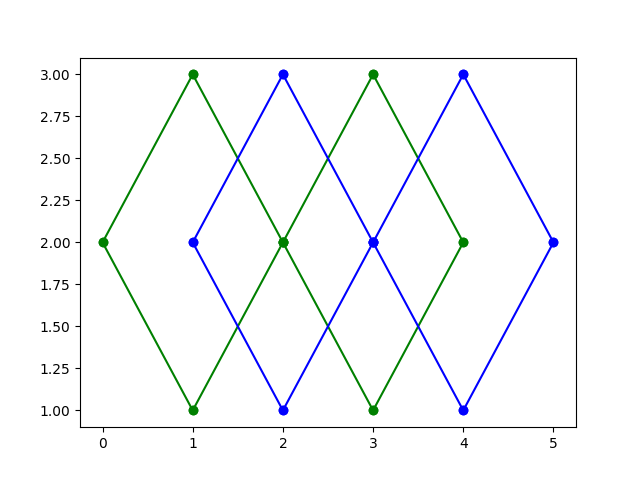

In [18]:
plt.close()
eps = 1e-10

vectors = [
    [eps, eps],
    [eps,-eps],
    [-eps,-eps],
    [-eps,eps]
]

def get_direction_of_line(beg, end):
    return (0 if end[0] - beg[0] > 0 else 2) + (1 if end[1] - beg[1] < 0 else 0)


#Firstly let's get list of lines from Dcel.el and Dcel.vl lists
S1_lines = []
for edge in S1.el:
    v1 = S1.vl[edge[0]]
    v2 = S1.vl[edge[1]]

    if v1 > v2:
        v1, v2 = v2, v1

    vec = vectors[get_direction_of_line(v1, v2)]

    v1 = list(v1)
    v2 = list(v2)

    v1[0] += vec[0]
    v1[1] += vec[1]
    v2[0] -= vec[0]
    v2[1] -= vec[1]

    v1 = tuple(v1)
    v2 = tuple(v2)

    S1_lines.append([v1, v2])

S2_lines = []  
for edge in S2.el:
    v1 = S2.vl[edge[0]]
    v2 = S2.vl[edge[1]]

    if v1 > v2:
        v1, v2 = v2, v1

    vec = vectors[get_direction_of_line(v1, v2)]

    v1 = list(v1)
    v2 = list(v2)

    v1[0] += vec[0]
    v1[1] += vec[1]
    v2[0] -= vec[0]
    v2[1] -= vec[1]

    v1 = tuple(v1)
    v2 = tuple(v2)

    S2_lines.append([v1, v2])

for line in S1_lines:
    x = [x[0] for x in line]
    y = [y[1] for y in line]
    plt.plot(x, y, color='green', marker='o')
    
for line in S2_lines:
    x = [x[0] for x in line]
    y = [y[1] for y in line]
    plt.plot(x, y, color='blue', marker='o')

In [19]:
S = overlay_of_subdivision(S1, S2)
S.build_dcel()
S.nfaces()

10

<IPython.core.display.Javascript object>


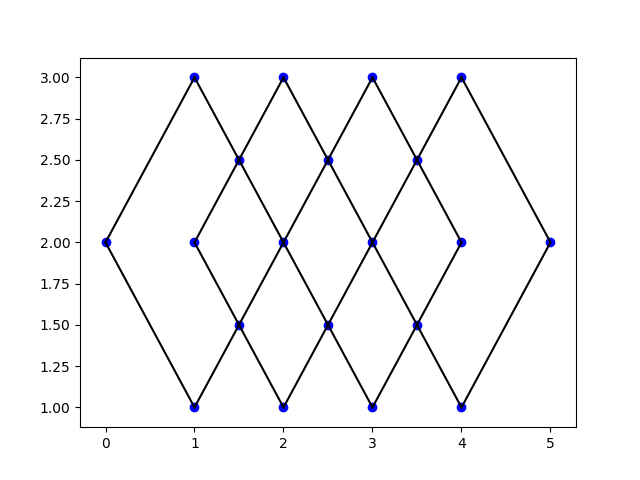

In [20]:
plt.close()
S_lines = []  
for edge in S.el:
    v1 = S.vl[edge[0]]
    v2 = S.vl[edge[1]]

    v1 = tuple(v1)
    v2 = tuple(v2)

    S_lines.append([v1, v2])
    
for line in S_lines:
    x = [x[0] for x in line]
    y = [y[1] for y in line]
    plt.plot(x, y, color='black')
    
for v in S.vl:
    plt.scatter(*v, color='blue')